# Homework 3    --Zheyi Wang (zw186)

## 1. Auto Encoder

In [41]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras import losses, optimizers
from tensorflow.keras import backend as K

from tensorflow.keras.datasets import fashion_mnist, mnist
import numpy as np
import matplotlib.pyplot as plt


In [28]:
# load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [20]:
# reshape
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

x_train.shape

(60000, 28, 28, 1)

In [16]:
# encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(4, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

# decoder
x = UpSampling2D((2, 2))(encoded)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 4)         40        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 4)         148       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         296       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
__________

In [23]:
# train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 108us/step - loss: 44.3320 - val_loss: 37.2239
Epoch 2/50
60000/60000 [==============================] - 5s 90us/step - loss: 37.2351 - val_loss: 36.1204
Epoch 3/50
60000/60000 [==============================] - 5s 90us/step - loss: 36.3012 - val_loss: 35.6623
Epoch 4/50
60000/60000 [==============================] - 5s 90us/step - loss: 35.8155 - val_loss: 35.4694
Epoch 5/50
60000/60000 [==============================] - 5s 91us/step - loss: 35.4844 - val_loss: 35.0313
Epoch 6/50
60000/60000 [==============================] - 5s 87us/step - loss: 35.2533 - val_loss: 34.8097
Epoch 7/50
60000/60000 [==============================] - 5s 87us/step - loss: 35.0540 - val_loss: 34.7736
Epoch 8/50
60000/60000 [==============================] - 5s 86us/step - loss: 34.9150 - val_loss: 34.7459
Epoch 9/50
60000/60000 [==============================] - 5s 87us/step - loss: 34.7848 - val_

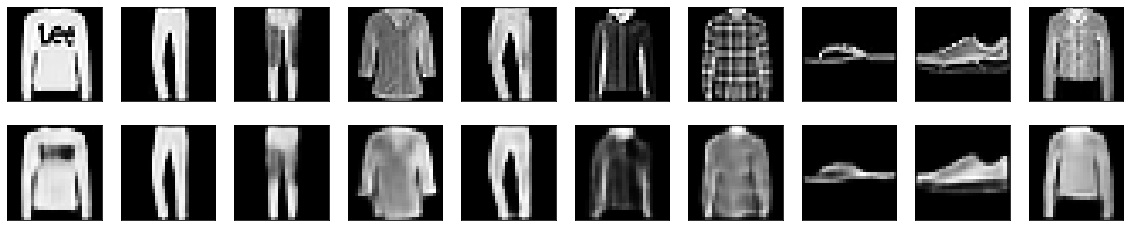

In [24]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Image Classification

### 2.1 Deep CNN

Kernel size: (3\*3)  
Strides: (2\*2)  
Padding: SAME  
Network depth: 11 layers (8 weight layers: 5 conv layers + 3 fc layer)

In [25]:
# CNN for classification
x_input = Input(shape=(28, 28, 1))
h = Conv2D(64, (3, 3), activation='relu', padding='same')(x_input)
h = Conv2D(64, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2, 2), strides=(2, 2))(h)

h = Conv2D(128, (3, 3), activation='relu', padding='same')(h)
h = Conv2D(128, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2, 2), strides=(2, 2))(h)

h = Conv2D(256, (3, 3), activation='relu', padding='same')(h)
h = Flatten()(h)
h = Dense(128, activation='relu')(h)
h = Dense(64, activation='relu')(h)
y_hat = Dense(10, activation='softmax')(h)

model = Model(x_input, y_hat)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
__________

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 227us/step - loss: 0.4527 - acc: 0.8351 - val_loss: 0.2974 - val_acc: 0.8927
Epoch 2/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.2556 - acc: 0.9063 - val_loss: 0.2674 - val_acc: 0.8973
Epoch 3/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.2056 - acc: 0.9240 - val_loss: 0.2528 - val_acc: 0.9114
Epoch 4/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.1746 - acc: 0.9343 - val_loss: 0.2131 - val_acc: 0.9241
Epoch 5/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.1495 - acc: 0.9442 - val_loss: 0.2098 - val_acc: 0.9247
Epoch 6/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.1213 - acc: 0.9555 - val_loss: 0.2202 - val_acc: 0.9261
Epoch 7/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.1013 - acc: 0.9623 - val_loss: 0.

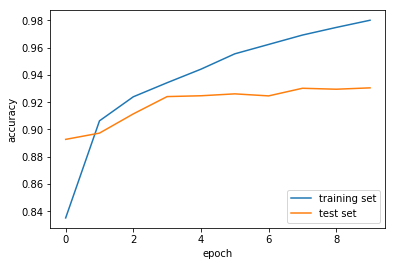

In [27]:
# model performance on training set
plt.plot(results.history['acc'], label="training set")
# model performance on test set
plt.plot(results.history['val_acc'], label="test set")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right')

### 2.2 Transfer Learning

Pretrained model: ResNet50

In [29]:
# reshape input date (..., 28, 28, 3)
x_train = np.stack((x_train, )*3, axis=-1)
x_test = np.stack((x_test, )*3, axis=-1)

In [30]:
# ResNet
from tensorflow.keras.applications.vgg16 import VGG16

x = Input(shape=(28, 28, 3))
x = ZeroPadding2D(padding = (2, 2))(x)

preTrainedModel = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3), input_tensor=x)
for layer in preTrainedModel.layers:
	layer.trainable = False # mark loaded layers as not trainable

h = preTrainedModel.output
h = Flatten()(h)
h = Dense(128, activation='relu')(h)
h = Dense(64, activation='relu')(h)
y_hat = Dense(10, activation='softmax')(h)
model = Model(preTrainedModel.input, y_hat)
y_hat.shape


58892288/58889256 [==============================] - 28s 0us/step


TensorShape([Dimension(None), Dimension(10)])

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.6373 - acc: 0.7795 - val_loss: 0.4788 - val_acc: 0.8209
Epoch 2/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.4279 - acc: 0.8441 - val_loss: 0.4470 - val_acc: 0.8397
Epoch 3/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.3914 - acc: 0.8564 - val_loss: 0.4045 - val_acc: 0.8502
Epoch 4/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.3663 - acc: 0.8656 - val_loss: 0.3853 - val_acc: 0.8608
Epoch 5/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.3495 - acc: 0.8708 - val_loss: 0.3742 - val_acc: 0.8655
Epoch 6/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.3362 - acc: 0.8760 - val_loss: 0.3714 - val_acc: 0.8639
Epoch 7/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.3258 - acc: 0.8791 - val_loss: 0.

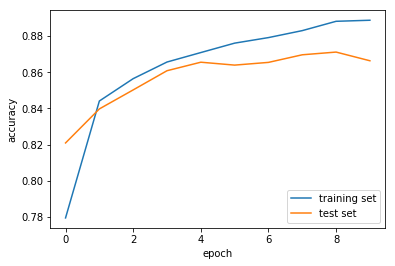

In [32]:
# model performance on training set
plt.plot(results.history['acc'], label="training set")
# model performance on test set
plt.plot(results.history['val_acc'], label="test set")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right')

## 3. Text Classification

### 3.1 RNN

In [48]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras import losses, optimizers
from tensorflow.keras import backend as K
import tensorflow as tf

from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import re 
import os

In [63]:
df = pd.read_csv('tweets_with_labels.csv', delimiter="	")
x = df['tweet']
y = df[['k1','k2','k3','k4','k5','k6','k7','k8','k9','k10','k11','k12','k13','k14','k15']]

In [54]:
# split into tokens
token = re.compile('[A-Za-z]+|[!?,.()]')
def reg_text(text):
    new_text = token.findall(text)
    new_text = [word.lower() for word in new_text]
    return new_text
x = x.apply(reg_text)

# build wordset
word_set = set()
for text in x:
    for word in text:
        word_set.add(word)

# build index dict
word_index = dict((word,list(word_set).index(word)+1) for word in word_set)

x_vector = x.apply(lambda x :[word_index.get(word,0) for word in x])

maxlen = max(len(x) for x in x_vector)  #49
max_word = len(word_set) +1 #39720

tweet_vector = tf.keras.preprocessing.sequence.pad_sequences(x_vector.values,maxlen=maxlen)

In [56]:
lstm_model = tf.keras.Sequential()
lstm_model.add(Embedding(max_word, 100, input_length=maxlen))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.5))
lstm_model.add(Flatten())
lstm_model.add(Dense(15, activation='softmax'))

lstm_model.summary()

lstm_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
lstm_results = lstm_model.fit(tweet_vector, y, epochs=10, batch_size=50, validation_split=0.3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 49, 100)           3972000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 15)                975       
Total params: 4,015,215
Trainable params: 4,015,215
Non-trainable params: 0
_________________________________________________________________
C:\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices

### 3.2 CNN

In [64]:
# split into tokens
def reg_text(text):
    new_text = [word.lower() for word in text]
    return new_text
x = x.apply(reg_text)

In [65]:
# build character set
cha_set = set()
for text in x:
    for cha in text:
        cha_set.add(cha)

# build index dict
cha_index = dict((cha,list(cha_set).index(cha)+1) for cha in cha_set)

x_vector = x.apply(lambda x :[cha_index.get(cha,0) for cha in x])

maxlen = max(len(x) for x in x_vector)  #180
max_cha = len(cha_set) +1   # 69


tweet_vector_cnn = tf.keras.preprocessing.sequence.pad_sequences(x_vector.values,maxlen=maxlen)

cnn_model = tf.keras.Sequential()
cnn_model.add(Embedding(max_cha, 100, input_length=maxlen))
cnn_model.add(Conv1D(64, 3, activation='relu', padding='same'))
cnn_model.add(Conv1D(64, 3, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(2, strides=2))
cnn_model.add(Conv1D(128, 3, activation='relu', padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dense(15, activation='softmax'))

cnn_model.summary()

cnn_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
cnn_results = cnn_model.fit(tweet_vector_cnn, y, epochs=10, batch_size=50, validation_split=0.3)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 180, 100)          6900      
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 180, 64)           19264     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 180, 64)           12352     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 90, 64)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 90, 128)           24704     
_________________________________________________________________
flatten_10 (Flatten)         (None, 11520)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               2949376   
__________

### 3.3 Compare RNN and CNN performance

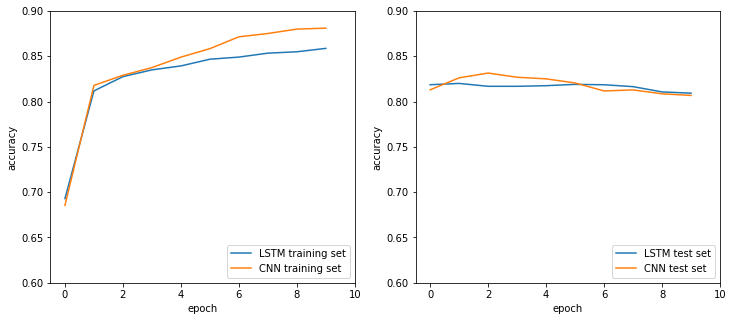

In [95]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(lstm_results.history['acc'], label="LSTM training set")
plt.plot(cnn_results.history['acc'], label="CNN training set")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.axis([-0.5,10,0.6,0.9])
plt.legend(loc = 'lower right')

plt.subplot(1, 2, 2)
plt.plot(lstm_results.history['val_acc'], label="LSTM test set")
plt.plot(cnn_results.history['val_acc'], label="CNN test set")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.axis([-0.5,10,0.6,0.9])
plt.legend(loc = 'lower right')

From the plots above, we can see that the model starts to overfit training data after 2 epochs.  
Although the training time of this RNN model is much longer than this CNN, their performances are pretty close.